

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/support_vector_machine/svm.ipynb)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
df = penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex","island","species"]]
dict = {'male':0,'female':1}
df = df.replace({'sex':dict})
dict = {'Biscoe':0,'Dream':1, 'Torgersen':2}
df = df.replace({'island':dict})
dict = {'Adelie':0,'Gentoo':1, 'Chinstrap':2}
df = df.replace({'species':dict})
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island,species
0,39.1,18.7,181.0,3750.0,0,2,0
1,39.5,17.4,186.0,3800.0,1,2,0
2,40.3,18.0,195.0,3250.0,1,2,0
4,36.7,19.3,193.0,3450.0,1,2,0
5,39.3,20.6,190.0,3650.0,0,2,0
...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,1,2
340,43.5,18.1,202.0,3400.0,1,1,2
341,49.6,18.2,193.0,3775.0,0,1,2
342,50.8,19.0,210.0,4100.0,0,1,2


In [ ]:
df0 = df[df.species == 0]
df1 = df[df.species == 1]
df2 = df[df.species == 2]

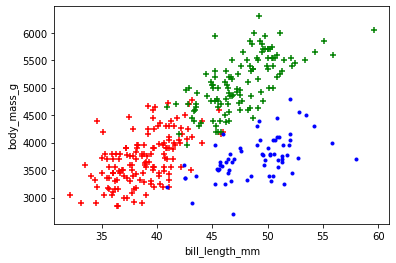

In [ ]:
plt.xlabel("bill_length_mm")
plt.ylabel("body_mass_g")
plt.scatter(df0["bill_length_mm"], df0["body_mass_g"], color='red', marker='+')
plt.scatter(df1["bill_length_mm"], df1["body_mass_g"], color='green', marker='+')
plt.scatter(df2["bill_length_mm"], df2["body_mass_g"], color='blue', marker='.')

In [ ]:
X = df.drop(['species'], axis='columns')
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island
0,39.1,18.7,181.0,3750.0,0,2
1,39.5,17.4,186.0,3800.0,1,2
2,40.3,18.0,195.0,3250.0,1,2
4,36.7,19.3,193.0,3450.0,1,2
5,39.3,20.6,190.0,3650.0,0,2


In [ ]:
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC(kernel='linear')

model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predict = pd.Series(model.predict(X_train))
value = pd.Series(y_train).reset_index(drop=True)
tempDF = pd.DataFrame()
tempDF["Prediction"] = predict
tempDF["Actual_Value"] = value
correct = [1 if predict[x] == value[x] else 0 for x in range(len(predict))]
tempDF["Correct"] = correct
accuracy = tempDF["Correct"].sum()/len(value)
print('Model Accuracy on train set: %.9f' % accuracy)
analysisDF = tempDF

predict = pd.Series(model.predict(X_test))
value = pd.Series(y_test).reset_index(drop=True)
tempDF = pd.DataFrame()
tempDF["Prediction"] = predict
tempDF["Actual_Value"] = value
correct = [1 if predict[x] == value[x] else 0 for x in range(len(predict))]
tempDF["Correct"] = correct
accuracy = tempDF["Correct"].sum()/len(value)
print("Model Accuracy on test set: %.9f" % accuracy)
analysisDFtest = tempDF

result = pd.concat([analysisDF, analysisDFtest])
numResult = result
dict = {0:'Adelie',1:'Gentoo',2:'Chinstrap'}
result = result.replace({'Prediction':dict})
result = result.replace({'Actual_Value':dict})
accuracy = result["Correct"].sum()/len(result["Correct"])
print('Overall Accuracy: %.9f' % accuracy)
result

NameError: ignored

In [ ]:
penCount = result['Actual_Value'].value_counts().reindex(result.Actual_Value.unique(), fill_value=0)
dfValue = result.loc[result['Correct'] == 1]
penCountError = dfValue["Actual_Value"].value_counts().reindex(result.Actual_Value.unique(), fill_value=0)

tempDF = pd.DataFrame()
tempDF["Amount"] = penCount
tempDF["Accuracy"] = pd.Series(penCountError.div(penCount))
tempDF

,Amount,Accuracy
Gentoo,119,1.000000
Adelie,146,0.993151
Chinstrap,68,1.000000


[[145   1   0]
 [  0  68   0]
 [  0   0 119]]


Text(0.5, 0, 'Predicted Label')

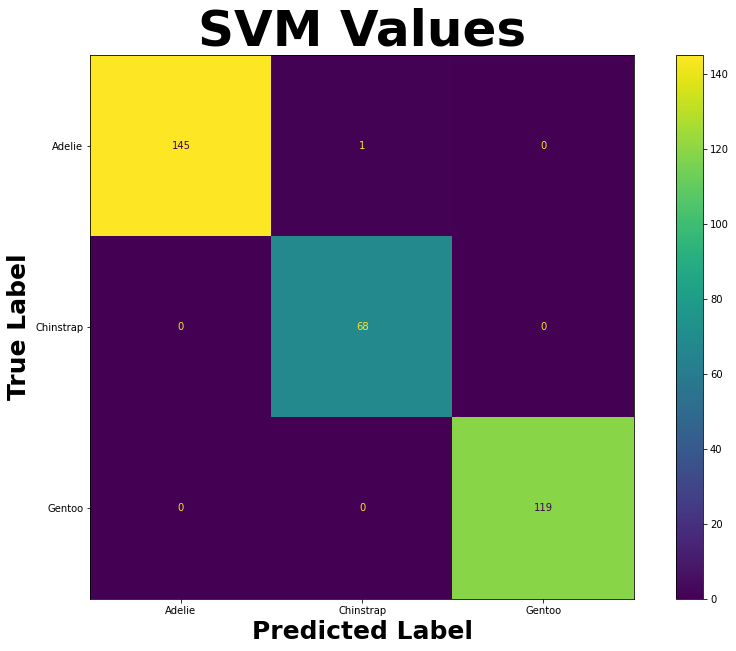

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result.Actual_Value, result.Prediction)
print(cm)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Adelie','Chinstrap','Gentoo'])

plt.rcParams['figure.figsize'] = [15,10]
display.plot()
display.ax_.set_title("SVM Values",fontsize = 50, fontweight = "bold")
display.ax_.set_ylabel("True Label", fontsize = 25, fontweight = "bold")
display.ax_.set_xlabel("Predicted Label", fontsize = 25, fontweight = "bold")

[[0.99315068 0.00684932 0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]


Text(0.5, 0, 'Predicted Label')

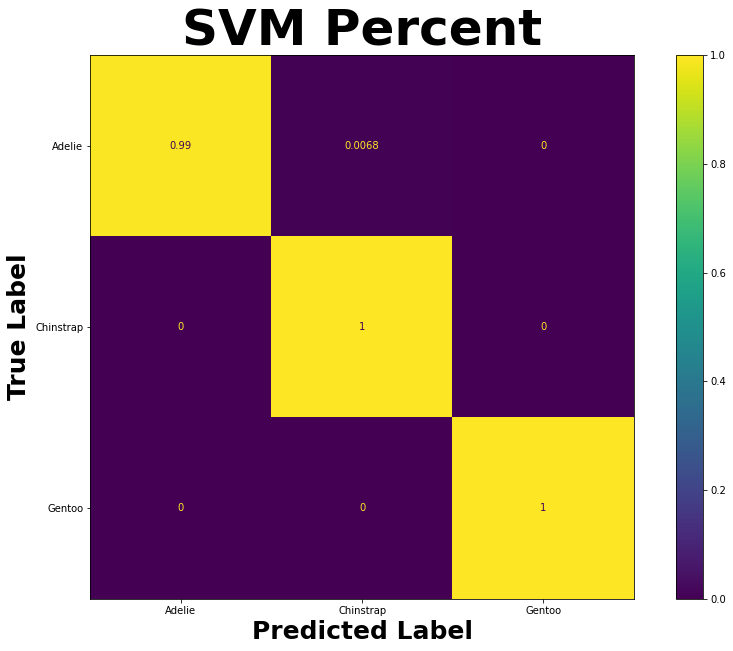

In [ ]:
cm = confusion_matrix(result.Actual_Value, result.Prediction, normalize='true')
print(cm)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Adelie','Chinstrap','Gentoo'])

plt.rcParams['figure.figsize'] = [15,10]
display.plot()
display.ax_.set_title("SVM Percent",fontsize = 50, fontweight = "bold")
display.ax_.set_ylabel("True Label", fontsize = 25, fontweight = "bold")
display.ax_.set_xlabel("Predicted Label", fontsize = 25, fontweight = "bold")